In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [35]:
Matches=pd.read_csv("matches.csv")

In [36]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [37]:
Matches.shape

(756, 18)

 # How many rows and columns are there?
 

In [38]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [39]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [40]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


# 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [41]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions 

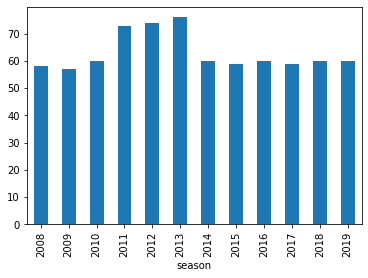

In [42]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [43]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [44]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

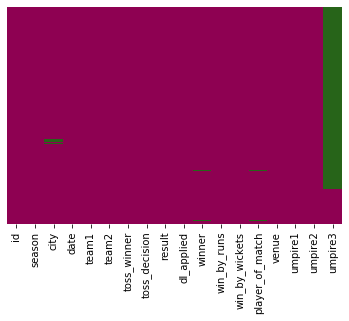

In [45]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [46]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#  Removed the columns containing more missing values and have less impact on the predicting matches

In [47]:
Matches=Matches.drop(['umpire3','city'],axis=1)

In [48]:
Matches.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


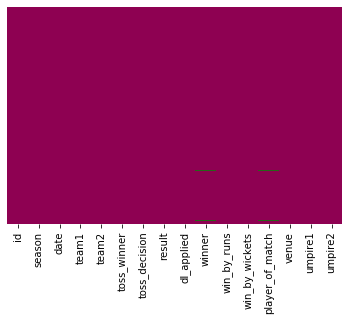

In [49]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between MI and KXIP.so we only want information between the matches that take place between them

In [50]:
MI_KXIP1=Matches.loc[(Matches['team1']=='Mumbai Indians')&(Matches['team2'] =='Kings XI Punjab')]

In [51]:
MI_KXIP1.head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
214,215,2010,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba
272,273,2011,2011-05-02,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,23,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,PR Reiffel
335,336,2012,2012-04-22,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,SE Marsh,Wankhede Stadium,S Ravi,RJ Tucker
420,421,2013,2013-04-29,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,RG Sharma,Wankhede Stadium,Asad Rauf,AK Chaudhary
551,552,2015,2015-05-03,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,LMP Simmons,"Punjab Cricket Association Stadium, Mohali",RK Illingworth,VA Kulkarni


In [52]:
MI_KXIP2=Matches.loc[(Matches['team2']=='Mumbai Indians')&(Matches['team1'] =='Kings XI Punjab')]

In [53]:
MI_KXIP2

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
21,22,2017,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin
49,50,2017,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore
68,69,2008,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba
105,106,2008,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar
134,135,2009,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri
156,157,2009,2009-05-12,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,8,Harbhajan Singh,SuperSport Park,SS Hazare,RE Koertzen
200,201,2010,2010-03-30,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore
286,287,2011,2011-05-10,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,76,0,BA Bhatt,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker
339,340,2012,2012-04-25,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,4,AT Rayudu,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,BNJ Oxenford
449,450,2013,2013-05-18,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,50,0,Azhar Mahmood,Himachal Pradesh Cricket Association Stadium,HDPK Dharmasena,CK Nandan


In [54]:
MI_KXIP=MI_KXIP1.append(MI_KXIP2)

#  Complete details of matches that takes place between MI and KKR

In [55]:
MI_KXIP

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
214,215,2010,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba
272,273,2011,2011-05-02,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,23,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,PR Reiffel
335,336,2012,2012-04-22,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,SE Marsh,Wankhede Stadium,S Ravi,RJ Tucker
420,421,2013,2013-04-29,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,RG Sharma,Wankhede Stadium,Asad Rauf,AK Chaudhary
551,552,2015,2015-05-03,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,LMP Simmons,"Punjab Cricket Association Stadium, Mohali",RK Illingworth,VA Kulkarni
596,597,2016,2016-04-25,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,25,0,PA Patel,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,RJ Tucker
618,619,2016,2016-05-13,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,CK Nandan
685,7943,2018,16/05/18,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,3,0,JJ Bumrah,Wankhede Stadium,Marais Erasmus,Nitin Menon
704,11145,2019,30/03/19,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,8,MA Agarwal,IS Bindra Stadium,Vineet Kulkarni,Chris Gaffaney
21,22,2017,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin


In [56]:
MI_KXIP['id'].value_counts()

287      1
505      1
421      1
69       1
7943     1
552      1
11145    1
106      1
619      1
524      1
479      1
11315    1
336      1
273      1
50       1
7927     1
340      1
597      1
22       1
215      1
135      1
201      1
157      1
450      1
Name: id, dtype: int64

In [57]:
MI_KXIP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 214 to 719
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   date             24 non-null     object
 3   team1            24 non-null     object
 4   team2            24 non-null     object
 5   toss_winner      24 non-null     object
 6   toss_decision    24 non-null     object
 7   result           24 non-null     object
 8   dl_applied       24 non-null     int64 
 9   winner           24 non-null     object
 10  win_by_runs      24 non-null     int64 
 11  win_by_wickets   24 non-null     int64 
 12  player_of_match  24 non-null     object
 13  venue            24 non-null     object
 14  umpire1          24 non-null     object
 15  umpire2          24 non-null     object
dtypes: int64(5), object(11)
memory usage: 3.2+ KB


In [58]:
MI_KXIP.describe

<bound method NDFrame.describe of         id  season        date            team1            team2  \
214    215    2010  2010-04-09   Mumbai Indians  Kings XI Punjab   
272    273    2011  2011-05-02   Mumbai Indians  Kings XI Punjab   
335    336    2012  2012-04-22   Mumbai Indians  Kings XI Punjab   
420    421    2013  2013-04-29   Mumbai Indians  Kings XI Punjab   
551    552    2015  2015-05-03   Mumbai Indians  Kings XI Punjab   
596    597    2016  2016-04-25   Mumbai Indians  Kings XI Punjab   
618    619    2016  2016-05-13   Mumbai Indians  Kings XI Punjab   
685   7943    2018    16/05/18   Mumbai Indians  Kings XI Punjab   
704  11145    2019    30/03/19   Mumbai Indians  Kings XI Punjab   
21      22    2017  2017-04-20  Kings XI Punjab   Mumbai Indians   
49      50    2017  2017-05-11  Kings XI Punjab   Mumbai Indians   
68      69    2008  2008-04-25  Kings XI Punjab   Mumbai Indians   
105    106    2008  2008-05-21  Kings XI Punjab   Mumbai Indians   
134    135    

In [66]:
MI_KXIP.groupby('id')

In [71]:
MI_KXIP.groupby('id').sum()

,season,dl_applied,win_by_runs,win_by_wickets
id,,,,
22,2017,0,0,8
50,2017,0,7,0
69,2008,0,66,0
106,2008,0,1,0
135,2009,0,3,0
157,2009,0,0,8
201,2010,0,0,4
215,2010,0,0,6
273,2011,0,23,0


# 24 Matches played between  MI and KXIP

In [59]:
print("No of matches that takes place between MI and KXIP:",len(MI_KXIP))

No of matches that takes place between MI and KXIP: 24


#  Below plot gives the details of the Features that takes place between KXIP and MI

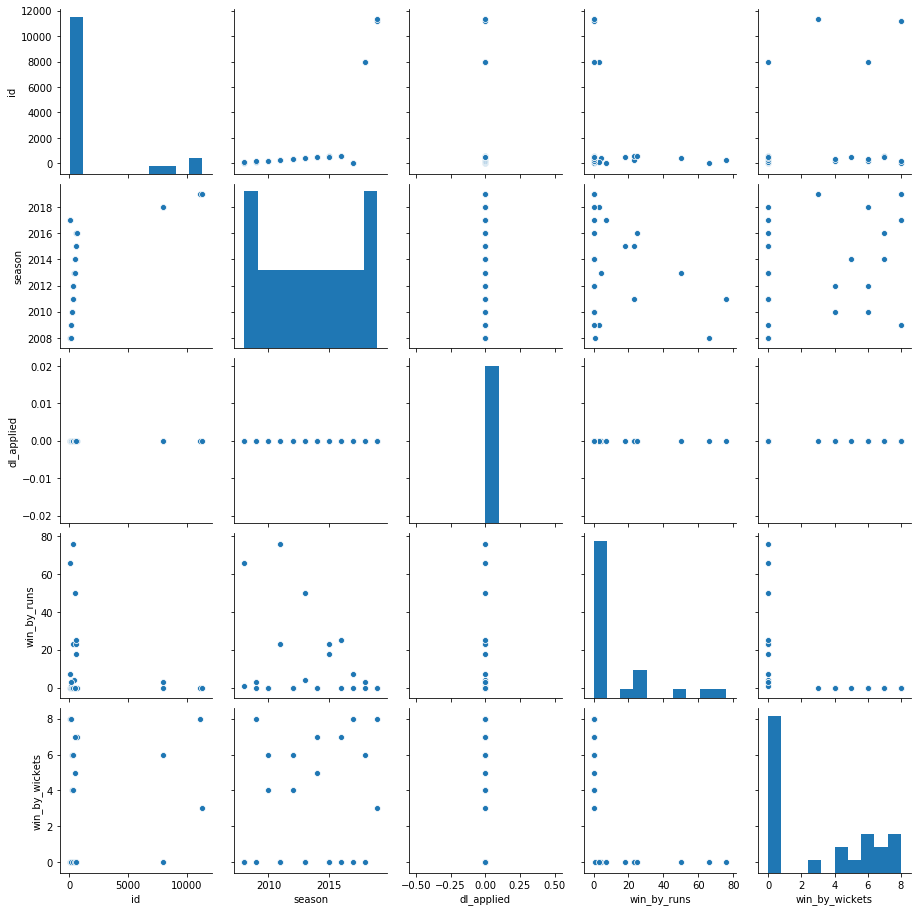

In [30]:
sns.pairplot(MI_KXIP)

# Now Time to answer the questions that were asked in the widhya ipl

In [60]:
MI_KXIP['toss_winner'].value_counts()

Mumbai Indians     16
Kings XI Punjab     8
Name: toss_winner, dtype: int64

# Sometimes Toss plays an crucial role in deciding the winner.MI won the Toss 15 times and KXIP won it 10 times

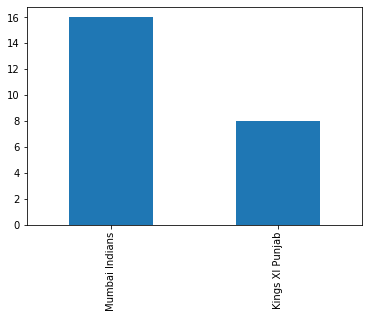

In [61]:
MI_KXIP['toss_winner'].value_counts().plot(kind='bar')

In [62]:
print("No of times toss won by both teams:")
MI_KXIP['toss_winner'].value_counts()

No of times toss won by both teams:


Mumbai Indians     16
Kings XI Punjab     8
Name: toss_winner, dtype: int64

# From 25 matches Mumbai Indians win 5 Times by Batting first and 8 times by Batting second whereas Kings XI Punjab win 4 times by batting first and 7 times by batting second.

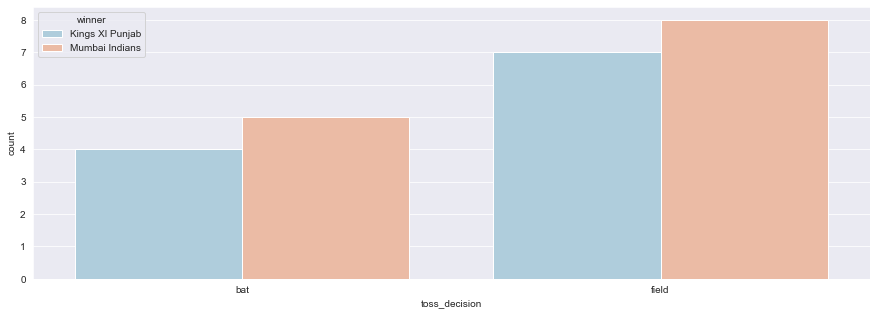

In [63]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue='winner',data=MI_KXIP,palette='RdBu_r')

In [64]:
MI_KXIP['winner'].value_counts()

Mumbai Indians     13
Kings XI Punjab    11
Name: winner, dtype: int64

# Who ll win the Match?

# From 24 matches MI won 13 times and KXIP won 11 times.so it clearly shows MI has an edge over KXIP.

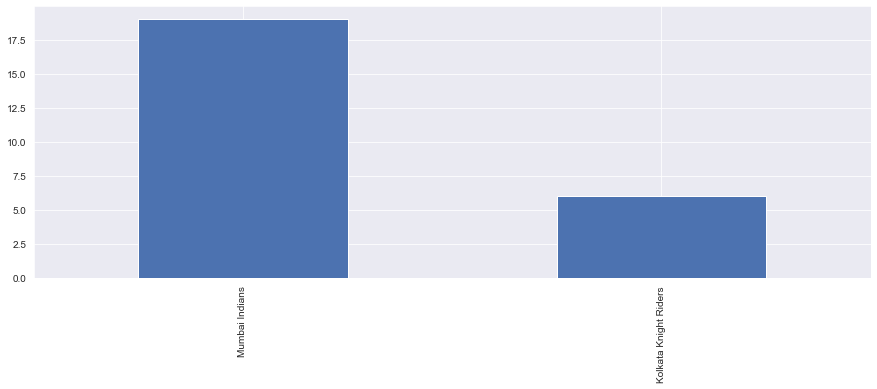

In [34]:
MI_KXIP['winner'].value_counts().plot(kind='bar')

In [98]:
print("From 24 matches Mumbai Indians won 14 Times and Kings XI Punjab won 11 Times")

From 24 matches Mumbai Indians won 14 Times and Kings XI Punjab won 11 Times


# Complete details MI_KXIP using sweetviz library

In [74]:
import sweetviz 
my_report=sweetviz.analyze([MI_KXIP,'MI_KXIP'])

:FEATURES DONE:                    |                     | [  0%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [75]:
my_report.show_html()

# Now it's time to move into deliveries data sets

In [3]:
Deliveries=pd.read_csv("deliveries.csv")

In [4]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
Deliveries.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [6]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Filtering the match details that only takes place between Kings XI  Punjab and Mumbai Indians

In [7]:
Mumbai_Punjab1=Deliveries.loc[(Deliveries['batting_team' ] =='Kings XI Punjab' ) & (Deliveries['bowling_team'] == 'Mumbai Indians')]

In [8]:
Mumbai_Punjab1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170452,11315,1,Kings XI Punjab,Mumbai Indians,20,2,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170453,11315,1,Kings XI Punjab,Mumbai Indians,20,3,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170454,11315,1,Kings XI Punjab,Mumbai Indians,20,4,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170455,11315,1,Kings XI Punjab,Mumbai Indians,20,5,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN


In [9]:
Mumbai_Punjab2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kings XI Punjab' ) & (Deliveries['batting_team'] == 'Mumbai Indians')]

In [10]:
Mumbai_Punjab2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5182,22,2,Mumbai Indians,Kings XI Punjab,1,1,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5183,22,2,Mumbai Indians,Kings XI Punjab,1,2,JC Buttler,PA Patel,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5184,22,2,Mumbai Indians,Kings XI Punjab,1,3,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
5185,22,2,Mumbai Indians,Kings XI Punjab,1,4,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5186,22,2,Mumbai Indians,Kings XI Punjab,1,5,JC Buttler,PA Patel,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [11]:
Mumbai_Punjab=Mumbai_Punjab1.append(Mumbai_Punjab2)

In [12]:
Mumbai_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [13]:
Mumbai_Punjab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 5055 to 170583
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          5834 non-null   int64 
 1   inning            5834 non-null   int64 
 2   batting_team      5834 non-null   object
 3   bowling_team      5834 non-null   object
 4   over              5834 non-null   int64 
 5   ball              5834 non-null   int64 
 6   batsman           5834 non-null   object
 7   non_striker       5834 non-null   object
 8   bowler            5834 non-null   object
 9   is_super_over     5834 non-null   int64 
 10  wide_runs         5834 non-null   int64 
 11  bye_runs          5834 non-null   int64 
 12  legbye_runs       5834 non-null   int64 
 13  noball_runs       5834 non-null   int64 
 14  penalty_runs      5834 non-null   int64 
 15  batsman_runs      5834 non-null   int64 
 16  extra_runs        5834 non-null   int64 
 17  total_run

In [14]:
Mumbai_Punjab.describe

<bound method NDFrame.describe of         match_id  inning     batting_team     bowling_team  over  ball  \
5055          22       1  Kings XI Punjab   Mumbai Indians     1     1   
5056          22       1  Kings XI Punjab   Mumbai Indians     1     2   
5057          22       1  Kings XI Punjab   Mumbai Indians     1     3   
5058          22       1  Kings XI Punjab   Mumbai Indians     1     4   
5059          22       1  Kings XI Punjab   Mumbai Indians     1     5   
...          ...     ...              ...              ...   ...   ...   
170579     11315       2   Mumbai Indians  Kings XI Punjab    20     3   
170580     11315       2   Mumbai Indians  Kings XI Punjab    20     4   
170581     11315       2   Mumbai Indians  Kings XI Punjab    20     5   
170582     11315       2   Mumbai Indians  Kings XI Punjab    20     6   
170583     11315       2   Mumbai Indians  Kings XI Punjab    20     7   

           batsman non_striker      bowler  is_super_over  ...  bye_runs  \
5

# Check For null values in features

In [15]:
Mumbai_Punjab.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
player_dismissed    5540
dismissal_kind      5540
fielder             5618
dtype: int64

# Fill Null values with 0

In [16]:
Mumbai_Punjab.fillna(0,inplace=True)

In [17]:
Mumbai_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,0,0,0
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,0,0,0,0,0,0
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,1,0,1,0,0,0
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,...,0,0,0,0,1,0,1,0,0,0


# Let's try covariance to find relation among features

In [18]:
Mumbai_Punjab.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.258948e+07,10.600632,216.403680,29.884976,0.0,5.163966,-7.474627,-8.980115,-4.691174,0.0,322.648481,-15.981950,306.666530
inning,1.060063e+01,0.249878,-0.110438,-0.001024,0.0,0.000384,0.000167,-0.000790,0.000062,0.0,-0.006096,-0.000177,-0.006273
over,2.164037e+02,-0.110438,32.607998,0.134279,0.0,0.039079,0.006774,0.006238,0.011066,0.0,0.821883,0.063158,0.885040
ball,2.988498e+01,-0.001024,0.134279,3.309483,0.0,-0.003890,-0.005906,-0.001569,0.001244,0.0,-0.025375,-0.010121,-0.035496
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,5.163966e+00,0.000384,0.039079,-0.003890,0.0,0.083167,-0.000274,-0.001089,-0.000207,0.0,-0.043725,0.081597,0.037872
bye_runs,-7.474627e+00,0.000167,0.006774,-0.005906,0.0,-0.000274,0.017275,-0.000160,-0.000030,0.0,-0.007814,0.016811,0.008997
legbye_runs,-8.980115e+00,-0.000790,0.006238,-0.001569,0.0,-0.001089,-0.000160,0.050282,-0.000121,0.0,-0.024692,0.048913,0.024221
noball_runs,-4.691174e+00,0.000062,0.011066,0.001244,0.0,-0.000207,-0.000030,-0.000121,0.004777,0.0,0.001885,0.004418,0.006303
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# it's diffult to interpret covariance.Let's try correlation.Correlation clearly mentions using discrete values 1=positively correlated,-1=Negatively correlated,0=No correlation.

In [19]:
Mumbai_Punjab.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.005977,0.010681,0.004630,NaN,0.005047,-0.016028,-0.011287,-0.019129,NaN,0.055386,-0.011563,0.052613
inning,0.005977,1.000000,-0.038690,-0.001126,NaN,0.002663,0.002546,-0.007051,0.001786,NaN,-0.007428,-0.000911,-0.007639
over,0.010681,-0.038690,1.000000,0.012926,NaN,0.023731,0.009025,0.004872,0.028038,NaN,0.087665,0.028393,0.094348
ball,0.004630,-0.001126,0.012926,1.000000,NaN,-0.007415,-0.024698,-0.003847,0.009894,NaN,-0.008496,-0.014282,-0.011878
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,0.005047,0.002663,0.023731,-0.007415,NaN,1.000000,-0.007229,-0.016834,-0.010402,NaN,-0.092349,0.726358,0.079942
bye_runs,-0.016028,0.002546,0.009025,-0.024698,NaN,-0.007229,1.000000,-0.005423,-0.003351,NaN,-0.036211,0.328344,0.041669
legbye_runs,-0.011287,-0.007051,0.004872,-0.003847,NaN,-0.016834,-0.005423,1.000000,-0.007804,NaN,-0.067070,0.559972,0.065753
noball_runs,-0.019129,0.001786,0.028038,0.009894,NaN,-0.010402,-0.003351,-0.007804,1.000000,NaN,0.016610,0.164110,0.055516
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ball by Ball Details of MI VS KXIP From 24 matches 

In [20]:
Mumbai_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,0,0,0
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,0,0,0,0,0,0
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,1,0,1,0,0,0
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,...,0,0,0,0,1,0,1,0,0,0


In [21]:
Mumbai_Punjab['match_id'].value_counts()

50       255
135      254
11315    252
421      251
201      251
7943     251
69       250
340      249
106      249
524      248
597      247
336      246
552      245
11145    244
479      243
505      243
273      242
450      242
7927     241
215      240
157      234
619      228
22       225
287      204
Name: match_id, dtype: int64

In [22]:
Mumbai_Punjab.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

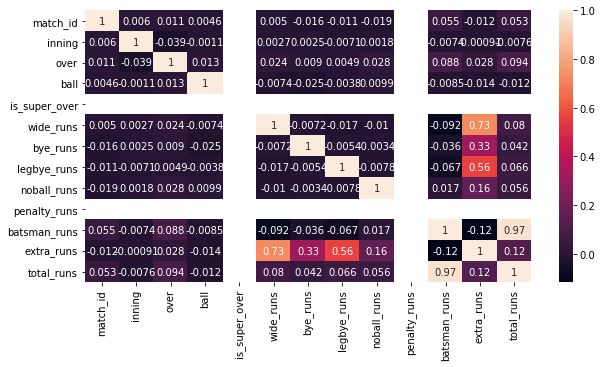

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(Mumbai_Punjab.corr(),yticklabels=True,annot=True)

# To What Type Of Bowler ll quinton De Kock ll Get out to? 

In [24]:
Quinton_De_Kock=Mumbai_Punjab2.loc[(Mumbai_Punjab2['batsman']=='Q de Kock')]

In [25]:
De_Kock_Dissmissal_Kind=Quinton_De_Kock['dismissal_kind']

In [26]:
De_Kock_Dissmissal_Kind.value_counts()

caught    1
lbw       1
Name: dismissal_kind, dtype: int64

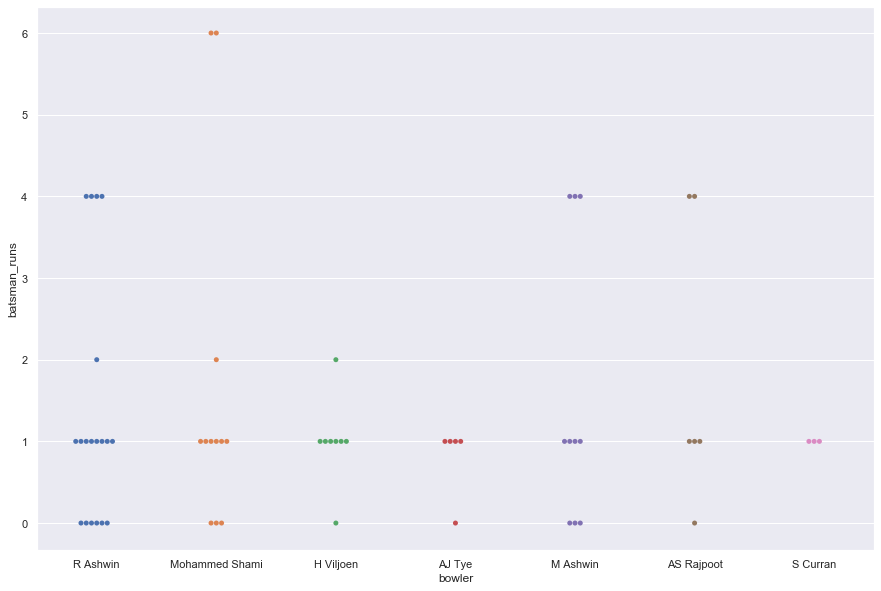

In [94]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='bowler',y='batsman_runs',data=Quinton_De_Kock)

# De_Kock(joined MI in 2019)only Played 2Matches against KXIP .In those matches he got out by caught and lbw

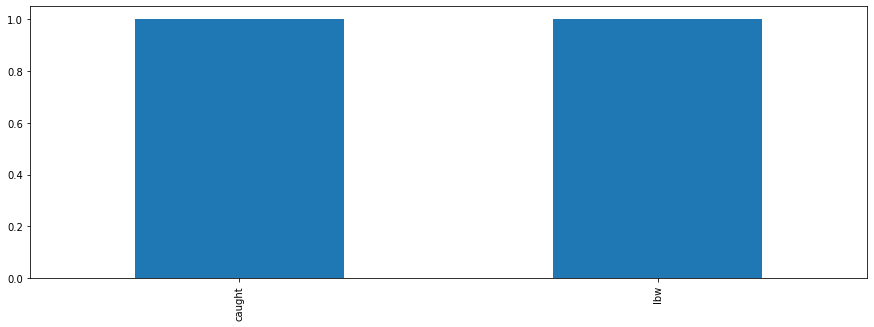

In [27]:
plt.figure(figsize=(15,5))
De_Kock_Dissmissal_Kind.value_counts().plot(kind='bar')

In [28]:
print("De_cock dismissal kind was  caught and lbw in those two matches against KXIP")
De_Kock_Dissmissal_Kind.value_counts()

De_cock dismissal kind was  caught and lbw in those two matches against KXIP


caught    1
lbw       1
Name: dismissal_kind, dtype: int64

# How many wickets ll KXIP lose in the powerplay(PP)?

In [29]:
Punjab_PP_Wickets=Mumbai_Punjab1.loc[(Mumbai_Punjab1['over']<=6)]

In [30]:
Punjab_PP_Wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170363,11315,1,Kings XI Punjab,Mumbai Indians,6,2,CH Gayle,KL Rahul,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170364,11315,1,Kings XI Punjab,Mumbai Indians,6,3,CH Gayle,KL Rahul,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170365,11315,1,Kings XI Punjab,Mumbai Indians,6,4,KL Rahul,CH Gayle,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
170366,11315,1,Kings XI Punjab,Mumbai Indians,6,5,KL Rahul,CH Gayle,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [31]:
punjab_PP_Wickets=Punjab_PP_Wickets['dismissal_kind']

In [32]:
punjab_PP_Wickets.value_counts()

caught     18
run out     4
lbw         3
bowled      2
stumped     1
Name: dismissal_kind, dtype: int64

In [42]:
print("Kings XI punjab lost around 28 wickets in powerplays from 24 matches against Mumbai Indians")

Kings XI punjab lost around 28 wickets in powerplays from 24 matches against Mumbai Indians


In [45]:
print("Average wickets lost by KXIP in PowerPlays",28/24)

Average wickets lost by KXIP in PowerPlays 1.1666666666666667


In [57]:
print("Average wickets lost by KXIP in PowerPlays is between 1-2")

Average wickets lost by KXIP in PowerPlays is between 1-2


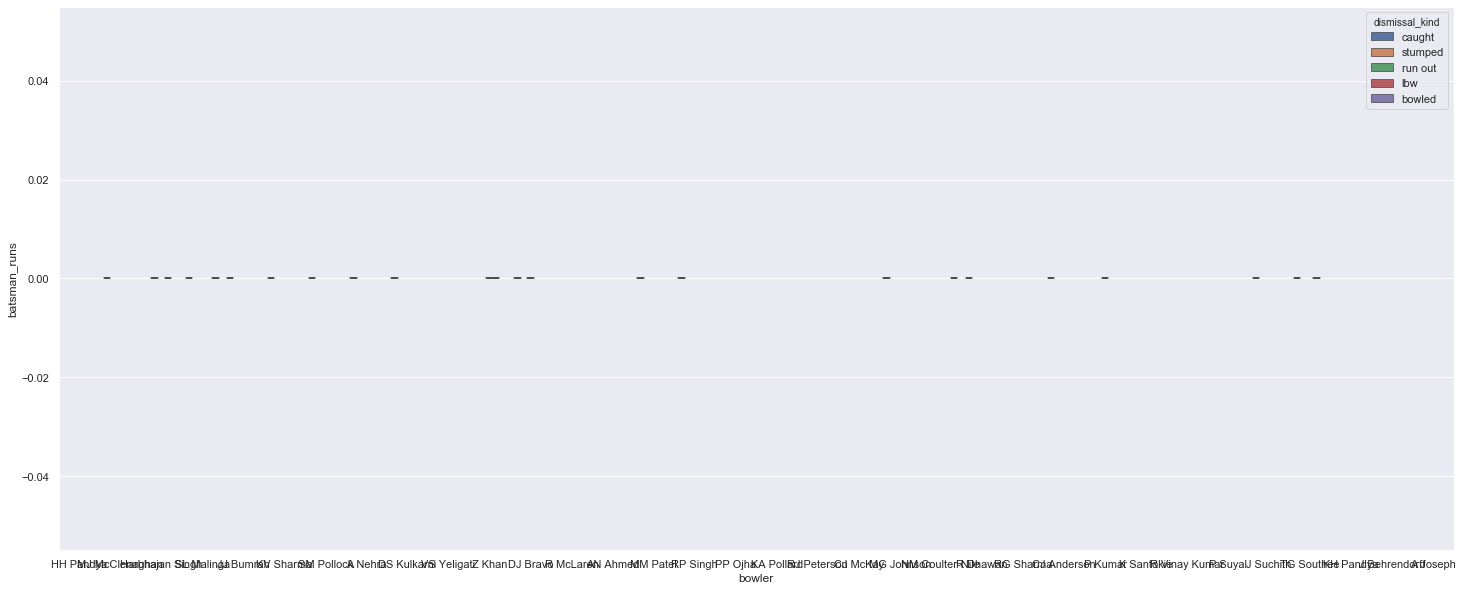

In [111]:
plt.figure(figsize=(25,10))
sns.boxplot(x='bowler',y='batsman_runs',hue='dismissal_kind',data=Punjab_PP_Wickets)

# They lost their Most wickets by getting caught

Text(0.5, 1.0, 'Kings XI Punjab Power Play Wickets')

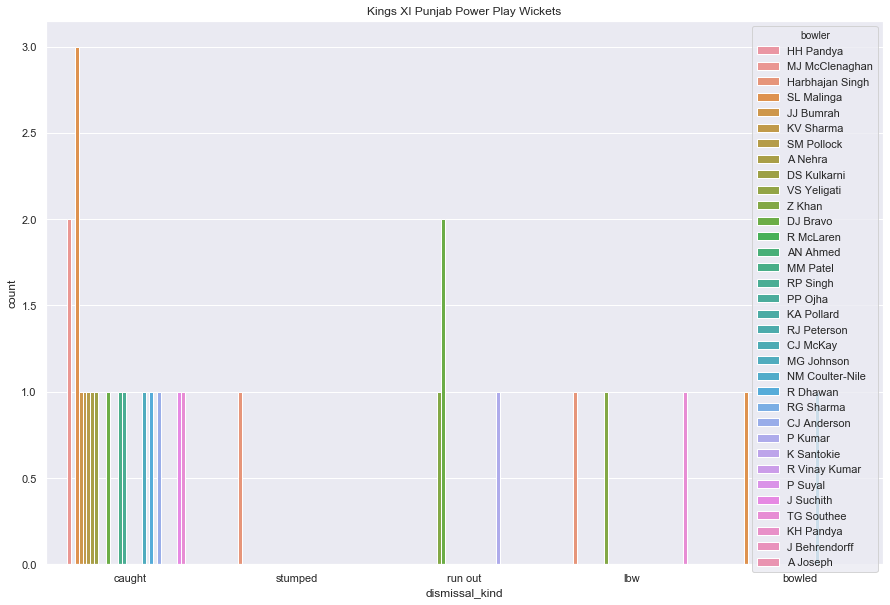

In [75]:
plt.figure(figsize=(15,10))
sns.countplot(x='dismissal_kind',hue='bowler',data=Punjab_PP_Wickets)
plt.title("Kings XI Punjab Power Play Wickets")

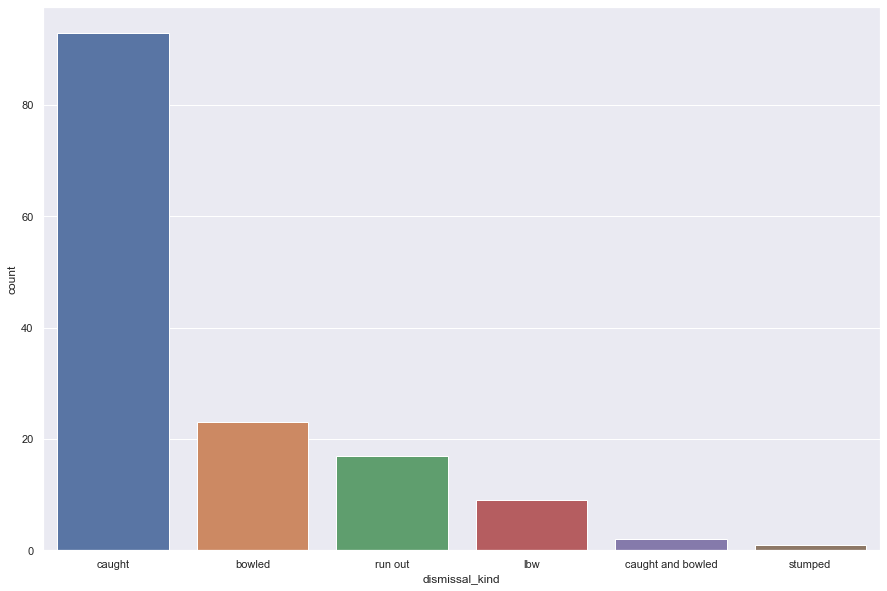

In [76]:
import sys
sys.setrecursionlimit(2000)
sns.set()
plt.figure(figsize=(15,10))
sns.countplot(x='dismissal_kind',data=Mumbai_Punjab1)

# How will KL Rahul Get Out?

In [50]:
Kl_Rahul=Mumbai_Punjab1.loc[(Mumbai_Punjab1['batsman']=='KL Rahul')]

In [51]:
Kl_Rahul['dismissal_kind'].value_counts()

caught    2
Name: dismissal_kind, dtype: int64

In [53]:
print("Kl Rahul got dismissed two times  by caught from his two matches against MI")

Kl Rahul got dismissed two times  by caught from his two matches against MI


# How many wickets ll fall in total during match?

In [79]:
Mumbai_Punjab.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,0,0,0
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,0,0,0
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,0,0,0


In [80]:
Mumbai_Punjab['dismissal_kind'].value_counts()

0                    5540
caught                185
bowled                 49
run out                28
lbw                    21
caught and bowled       6
stumped                 4
hit wicket              1
Name: dismissal_kind, dtype: int64

In [85]:
print("Total of 294 wickets were fallen on 24 matches between MI and KXIP ")

Total of 294 wickets were fallen on 24 matches between MI and KXIP 


In [87]:
print("Total number of wickets lost by both teams in a single match",294//24)

Total number of wickets lost by both teams in a single match 12


# # From my analysing and considering current matches and current form of Team and it's players.I predicted the following,
# 1.MI will win the match
# 2.Quinton_de_Kock get out to Seam/Fast Bowlers
# 3.KXIP ll lose around 0-1 wickets in powerPlay
# 4.KL Rahul get out to Caught
# 5.11-15 wickets ll  be Fallen during the entire Match
# These results are solely based on my analysis.Don't forget this year IPL has been played in UAE.So Data's from the past ll be contrary to the current stats.